# Data exploration

In [125]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

In [126]:
data_dir = Path('../data')
result_dir = Path('../results')

In [127]:
raw_csv =  data_dir / 'dm1_dataset_2425_imdb/train.csv'
df = pd.read_csv(raw_csv)
df.shape

(16431, 23)

In [128]:
df.head()

originalTitle  rating  startYear endYear  \
0  Neogenic Nightmare Chapter 3: Hydro-Man  (7, 8]       1995      \N   
1                                  Looping  (5, 6]       1982      \N   
2                           Idealnaya para  (5, 6]       1992      \N   
3              MasterChef Celebrity México  (5, 6]       2021      \N   
4                              Seutateueob  (7, 8]       2020    2020   

  runtimeMinutes  awardWins  numVotes  worstRating  bestRating  totalImages  \
0             \N        0.0       779            1          10            1   
1             \N        0.0        11            1          10            1   
2             \N        0.0        38            1          10            1   
3             \N        0.0        15            1          10           22   
4             80        1.0     15718            1          10          347   

   ...  titleType  awardNominationsExcludeWins  canHaveEpisodes isRatable  \
0  ...  tvEpisode                            0            False      True   
1  ...  videoGame                            0            False      True   
2  ...      movie                            0            False      True   
3  ...   tvSeries                            0             True      True   
4  ...   tvSeries                            1             True      True   

   isAdult  numRegions  userReviewsTotal  ratingCount  countryOfOrigin  \
0        0           1                 0          781           ['US']   
1        0           1                 0           11          ['XWG']   
2        0           1                 1           38           ['RU']   
3        0           1                 0           15           ['MX']   
4        0          32               452        15746           ['KR']   

                       genres  
0  Action,Adventure,Animation  
1                      Action  
2                      Comedy  
3                  Reality-TV  
4        Comedy,Drama,Romance  

[5 rows x 23 columns]

We can see that some null values are encoded as '\N' in the original dataset, so we can say that to pandas when loading the dataframe from the csv.
We can pass to `read_csv` the parameter `na_values` with a list of strings to recognize as `NaN`.

In [129]:
df = pd.read_csv(raw_csv, na_values=['\\N'])
df.head()

originalTitle  rating  startYear  endYear  \
0  Neogenic Nightmare Chapter 3: Hydro-Man  (7, 8]       1995      NaN   
1                                  Looping  (5, 6]       1982      NaN   
2                           Idealnaya para  (5, 6]       1992      NaN   
3              MasterChef Celebrity México  (5, 6]       2021      NaN   
4                              Seutateueob  (7, 8]       2020   2020.0   

   runtimeMinutes  awardWins  numVotes  worstRating  bestRating  totalImages  \
0             NaN        0.0       779            1          10            1   
1             NaN        0.0        11            1          10            1   
2             NaN        0.0        38            1          10            1   
3             NaN        0.0        15            1          10           22   
4            80.0        1.0     15718            1          10          347   

   ...  titleType  awardNominationsExcludeWins  canHaveEpisodes isRatable  \
0  ...  tvEpisode                            0            False      True   
1  ...  videoGame                            0            False      True   
2  ...      movie                            0            False      True   
3  ...   tvSeries                            0             True      True   
4  ...   tvSeries                            1             True      True   

   isAdult  numRegions  userReviewsTotal  ratingCount  countryOfOrigin  \
0        0           1                 0          781           ['US']   
1        0           1                 0           11          ['XWG']   
2        0           1                 1           38           ['RU']   
3        0           1                 0           15           ['MX']   
4        0          32               452        15746           ['KR']   

                       genres  
0  Action,Adventure,Animation  
1                      Action  
2                      Comedy  
3                  Reality-TV  
4        Comedy,Drama,Romance  

[5 rows x 23 columns]

`CountryofOrigin` and `genres` contain collections of categorical values.
We can transform them in lists in order to handle them with more ease.

In [130]:
import ast
df['countryOfOrigin'] = df['countryOfOrigin'].apply(ast.literal_eval)
df['genres'] = df['genres'].str.split(',')

In [131]:
df['countryOfOrigin'][0], df['genres'][0]

(['US'], ['Action', 'Adventure', 'Animation'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      814 non-null    float64
 4   runtimeMinutes               11579 non-null  float64
 5   awardWins                    13813 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   worstRating                  16431 non-null  int64  
 8   bestRating                   16431 non-null  int64  
 9   totalImages                  16431 non-null  int64  
 10  totalVideos                  16431 non-null  int64  
 11  totalCredits                 16431 non-null  int64  
 12  criticReviewsTotal           16431 non-null  int64  
 13  titleType       

Only tv series and miniseries have a end year, but not all of them, probably because it doesn't make sense for serial productions which are still running or miniseries that run for a limited period of time.

Since this property has so many missing values, it is probably safe to drop it.

In [133]:
missing_endyear = df['endYear'].isnull()
df[~ missing_endyear]['titleType'].unique()

array(['tvSeries', 'tvMiniSeries'], dtype=object)

We can see that the serial title that miss the end year are either tv miniseries which have a limited run or tvSeries which are probably still airing.

In [134]:
is_serial = df['titleType'].isin(['tvSeries', 'tvMiniSeries'])
df[is_serial & missing_endyear][['originalTitle', 'startYear', 'endYear', 'titleType']]

originalTitle  startYear  endYear     titleType
3      MasterChef Celebrity México       2021      NaN      tvSeries
7                        Nanba MG5       2022      NaN  tvMiniSeries
9                       Ulot Puran       2022      NaN  tvMiniSeries
99                    The Diplomat       2023      NaN      tvSeries
140             Drive Thru History       2005      NaN      tvSeries
...                            ...        ...      ...           ...
16307                 See HIM Fuck       2019      NaN      tvSeries
16349              American Agenda       2019      NaN      tvSeries
16352                     L'idiota       1959      NaN  tvMiniSeries
16388             Glykes alhimeies       2008      NaN      tvSeries
16405            Yuhuwa Chingudeul       2011      NaN      tvSeries

[785 rows x 4 columns]

`awardWins` has some missing values. It makes sense to fill them with 0 since it is the most frequent value for that feature.

In [135]:
df['awardWins'].describe()

count    13813.000000
mean         0.491855
std          2.974264
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        145.000000
Name: awardWins, dtype: float64

In [136]:
df['awardWins'].fillna(0, inplace=True)

C:\Users\camim\AppData\Local\Temp\ipykernel_28460\1439164916.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['awardWins'].fillna(0, inplace=True)


In [137]:
df[df['canHaveEpisodes']]['titleType'].value_counts()

titleType
tvSeries        1375
tvMiniSeries     224
Name: count, dtype: int64

`rating` is the IMDB rating class for the title. This is an ordinal feature, so it probably makes sense to create also a numerical feature `ratingNum` based on this in order to be able to perform regression analysis on it.

Also, `isAdult` should be boolean.

In [138]:
rating_classes = sorted(df['rating'].unique())
rating_classes

['(0, 1]',
 '(1, 2]',
 '(2, 3]',
 '(3, 4]',
 '(4, 5]',
 '(5, 6]',
 '(6, 7]',
 '(7, 8]',
 '(8, 9]',
 '(9, 10]']

In [139]:
rating_map = {
    rclass: i+1
    for i, rclass in enumerate(rating_classes)
}

df['ratingNum'] = df['rating']
df = df.replace({'ratingNum': rating_map, 'isAdult': {0: False, 1:True}})
df[['rating', 'ratingNum', 'isAdult']].head()

C:\Users\camim\AppData\Local\Temp\ipykernel_28460\650284600.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'ratingNum': rating_map, 'isAdult': {0: False, 1:True}})


rating  ratingNum  isAdult
0  (7, 8]          8    False
1  (5, 6]          6    False
2  (5, 6]          6    False
3  (5, 6]          6    False
4  (7, 8]          8    False

`bestRating` , `WorstRating` and `isRatable` can be safely dropped, since they provide no information at all.

In [140]:
print(df['bestRating'].value_counts())
print(df['worstRating'].value_counts())
print(df['isRatable'].value_counts())

bestRating
10    16431
Name: count, dtype: int64
worstRating
1    16431
Name: count, dtype: int64
isRatable
True    16431
Name: count, dtype: int64


In [141]:
df = df.drop(['bestRating', 'worstRating', 'isRatable'], axis=1)

In [142]:
df.describe()

startYear      endYear  runtimeMinutes     awardWins       numVotes  \
count  16431.000000   814.000000    11579.000000  16431.000000   16431.000000   
mean    1991.867081  2001.574939       61.222644      0.413487    1492.153551   
std       26.120690    18.449257       52.110187      2.732959   20137.708096   
min     1878.000000  1945.000000        0.000000      0.000000       5.000000   
25%     1978.000000  1989.000000       25.000000      0.000000      15.000000   
50%     1997.000000  2005.500000       58.000000      0.000000      36.000000   
75%     2013.000000  2018.000000       90.000000      0.000000     148.500000   
max     2024.000000  2025.000000     3000.000000    145.000000  966565.000000   

        totalImages   totalVideos  totalCredits  criticReviewsTotal  \
count  16431.000000  16431.000000  16431.000000        16431.000000   
mean      11.477025      0.271499     61.341976            2.785527   
std       74.254261      3.115448    174.017450           15.411389   
min        0.000000      0.000000      0.000000            0.000000   
25%        1.000000      0.000000     16.000000            0.000000   
50%        1.000000      0.000000     34.000000            0.000000   
75%        6.000000      0.000000     65.000000            1.000000   
max     3504.000000    258.000000  15742.000000          533.000000   

       awardNominationsExcludeWins    numRegions  userReviewsTotal  \
count                 16431.000000  16431.000000      16431.000000   
mean                      0.558883      3.549206          7.228410   
std                       3.955372      5.854671         66.495606   
min                       0.000000      1.000000          0.000000   
25%                       0.000000      1.000000          0.000000   
50%                       0.000000      1.000000          0.000000   
75%                       0.000000      3.000000          2.000000   
max                     197.000000     69.000000       5727.000000   

         ratingCount     ratingNum  
count   16431.000000  16431.000000  
mean     1492.915039      7.155620  
std     20145.393446      1.386902  
min         5.000000      1.000000  
25%        15.000000      6.000000  
50%        36.000000      7.000000  
75%       149.000000      8.000000  
max    967042.000000     10.000000

`numVotes` and `RatingCount` are almost exactly the same, so we can drop one of the two.

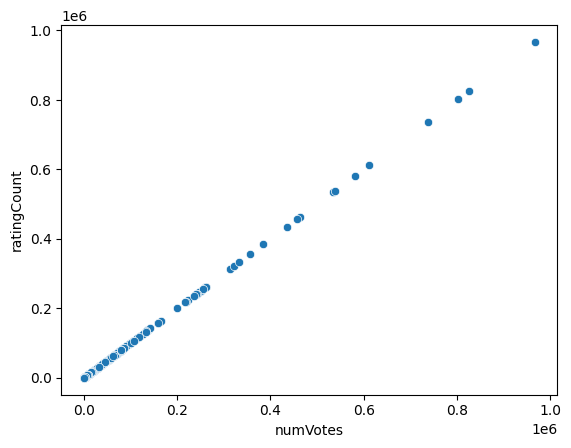

In [143]:
sns.scatterplot(df, x='numVotes', y='ratingCount')
plt.show()

In [144]:
df = df.drop(['ratingCount'], axis=1)

## Analysis of Categorical Features

`genres` and `countryOfOrigin` contain list of values. We can analyse the distribution of these features exploding the dataset such as a record with n genres will be represented by n rows (the same goes for country of origin).

In [145]:
df_expl = df.explode('genres')
df_expl = df_expl.explode('countryOfOrigin')

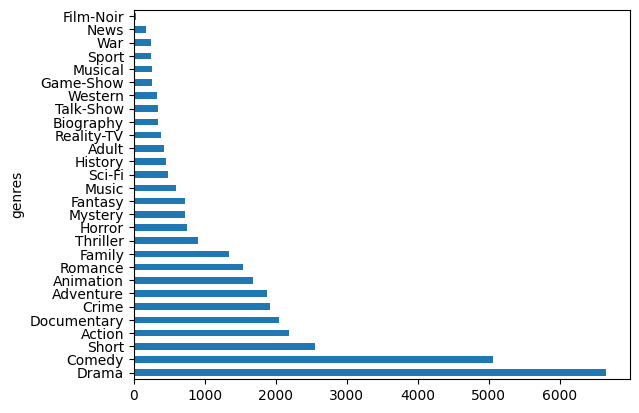

In [146]:
df_expl['genres'].value_counts().plot(kind='barh')
plt.show()

We can see that the feature `isAdult` is redundant with information already present in the `genres` feature, so we can safely drop it from the original data frame.

In [147]:
df_expl[df_expl['genres'] == 'Adult']['isAdult'].value_counts()
df = df.drop('isAdult', axis=1)

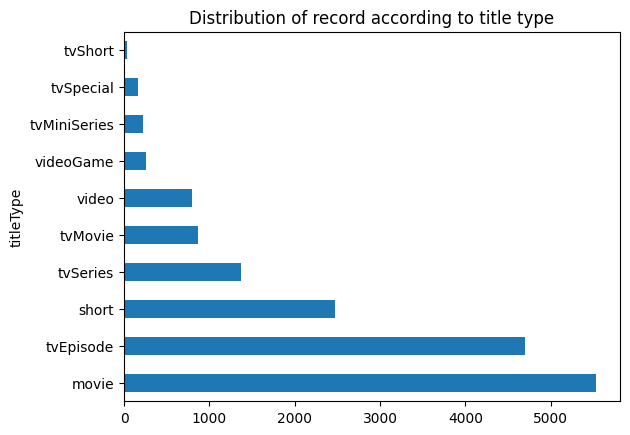

In [148]:
df['titleType'].value_counts().plot.barh()
plt.title("Distribution of record according to title type")
plt.show()

We can see there is some variation in the frequency of different genres wrt title type. Since we have some missing values for the feature `genres`, we will fill them with the most frequent genres with respect to the title type of the record.

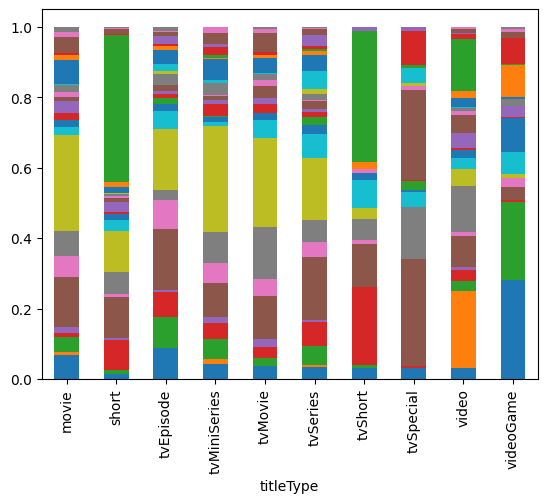

In [149]:
genre_by_titletype = pd.crosstab(df_expl['titleType'], df_expl['genres'])
genre_by_titletype.div(genre_by_titletype.sum(1), axis=0).plot(kind='bar', stacked=True, legend=False)
plt.show()

In [150]:
no_genre = df['genres'].isna()
df[no_genre]['titleType'].value_counts()

titleType
movie           230
tvSeries         53
tvMovie          25
video            23
tvSpecial        18
tvMiniSeries     15
videoGame        12
tvEpisode         6
Name: count, dtype: int64

In [151]:
genrelist_by_type = df.groupby('titleType')['genres'].describe()
genrelist_by_type

count unique                           top freq
titleType                                                   
movie         5305    444                       [Drama]  958
short         2474    208                       [Short]  402
tvEpisode     4692    334                      [Comedy]  450
tvMiniSeries   209     81                       [Drama]   40
tvMovie        843    161                       [Drama]  157
tvSeries      1322    213                      [Comedy]  193
tvShort         40     17    [Animation, Family, Short]    7
tvSpecial      148     30                      [Comedy]   37
video          769    184                       [Adult]  193
videoGame      247     78  [Action, Adventure, Fantasy]   27

In [152]:
top_genres = genrelist_by_type['top'].to_dict()
top_genres

{'movie': ['Drama'],
 'short': ['Short'],
 'tvEpisode': ['Comedy'],
 'tvMiniSeries': ['Drama'],
 'tvMovie': ['Drama'],
 'tvSeries': ['Comedy'],
 'tvShort': ['Animation', 'Family', 'Short'],
 'tvSpecial': ['Comedy'],
 'video': ['Adult'],
 'videoGame': ['Action', 'Adventure', 'Fantasy']}

In [153]:
df['genres'].fillna(df['titleType'].map(top_genres), inplace=True)
df[no_genre][['originalTitle', 'titleType', 'genres']].head()


C:\Users\camim\AppData\Local\Temp\ipykernel_28460\4269346808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna(df['titleType'].map(top_genres), inplace=True)


originalTitle  titleType    genres
31                                  Senjô no nadeshiko      movie   [Drama]
98                                              Ashbah      movie   [Drama]
113                              En fisker i Hanstholm      movie   [Drama]
137  XXXVII Festival Internacional de Cine de San S...  tvSpecial  [Comedy]
245                          Shabarimale Swamy Ayyappa      movie   [Drama]

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16431 non-null  object 
 1   rating                       16431 non-null  object 
 2   startYear                    16431 non-null  int64  
 3   endYear                      814 non-null    float64
 4   runtimeMinutes               11579 non-null  float64
 5   awardWins                    16431 non-null  float64
 6   numVotes                     16431 non-null  int64  
 7   totalImages                  16431 non-null  int64  
 8   totalVideos                  16431 non-null  int64  
 9   totalCredits                 16431 non-null  int64  
 10  criticReviewsTotal           16431 non-null  int64  
 11  titleType                    16431 non-null  object 
 12  awardNominationsExcludeWins  16431 non-null  int64  
 13  canHaveEpisodes 

No more missing values in the `genres` column.

Since there are too many country of origin, we display only the 20 most frequent ones.

In [155]:
len(df_expl['countryOfOrigin'].unique())

153

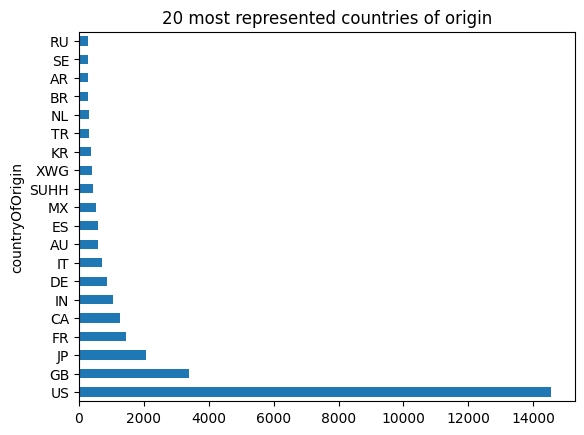

In [156]:
country_counts = df_expl['countryOfOrigin'].value_counts()
country_counts.to_frame().head(20).plot.barh(legend=False)
plt.title("20 most represented countries of origin")
plt.show()

Now that there aren't any more missing values in the `genres` column, we create two new columns that count the number of genres and the number of countries of origin of a record.

In [157]:
df['numGenres'] = df['genres'].str.len()
df['numCountriesOfOrigin'] = df['countryOfOrigin'].str.len()

We add a column that contains the total of reviews overall

In [158]:
df['reviewsTotal'] = df['criticReviewsTotal'] + df['userReviewsTotal']

We also add a column that contains the proportion of review from critics on the total number of reviews of a record.
The missing values in this column are records that were not reviewed:
we set the value of `criticReviewsRatio` for these records to 0. 

In [159]:
df['criticReviewsRatio'] = df['criticReviewsTotal'] / df['reviewsTotal']
print("Number of missing values:", sum(df['criticReviewsRatio'].isnull()))
df['criticReviewsRatio'].fillna(0, inplace=True)

Number of missing values: 8025


C:\Users\camim\AppData\Local\Temp\ipykernel_28460\3371329911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['criticReviewsRatio'].fillna(0, inplace=True)


We also add a column counting all awards and nominations.

In [160]:
df['awardsAndNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']

## Distribution of numeric features and correlation analysis

We create a list of numeric columns for further analysis.

In [161]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'countryOfOrigin',
       'genres', 'ratingNum', 'numGenres', 'numCountriesOfOrigin',
       'reviewsTotal', 'criticReviewsRatio', 'awardsAndNominations'],
      dtype='object')

In [162]:
num_cols = ['ratingNum','startYear', 'endYear', 'runtimeMinutes', 'awardWins', 'numVotes',
            'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins',
            'awardsAndNominations', 'numRegions', 'userReviewsTotal', 'numGenres', 'numCountriesOfOrigin',
            'reviewsTotal','criticReviewsRatio']

Looking at the time series for `startYear`, we can see a consistent growth in the number of titles being released each year. In more recent years, we see a significant drop around 2001 (which could be linked to the aftermath of 9/11) and after 2020 (probably due to the Covid-19 pandemic).
As we already know, there is much less data available for `endYear`, but we can see it follows the same trends on a smaller scale. There are no dates available before the 1940s, which is understandable, as serialized content was not produced until around the 1930s.

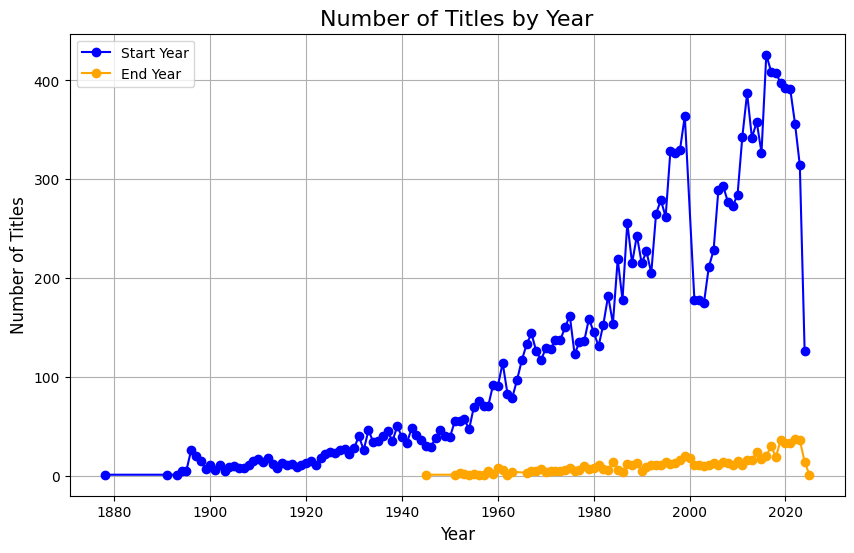

In [163]:
start_year_counts = df['startYear'].value_counts().sort_index()
end_year_counts = df['endYear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.plot(start_year_counts.index, start_year_counts.values, marker='o', label='Start Year', color='blue')
plt.plot(end_year_counts.index, end_year_counts.values, marker='o', label='End Year', color='orange')

plt.title('Number of Titles by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

We can see that most numeric features (`awardWins`,`numVotes`, `totalImages`,`totalVideos`,`totalCredits`,`criticReviewsTotal`, `awardNominationsExcludeWins`,`awardsAndNominations`,`numRegions`, `userReviewsTotal`, `numCountriesOfOrigin`, `reviewsTotal`) have heavily right-skewed distributions. It makes sense that the distribution of these type of features would approximate a power law. We can address this problem using a log transformation of these features.

In addition to that `startYear` and `endYear` are heavily correlated so we can drop `endYear` which has also a lot of missing values.

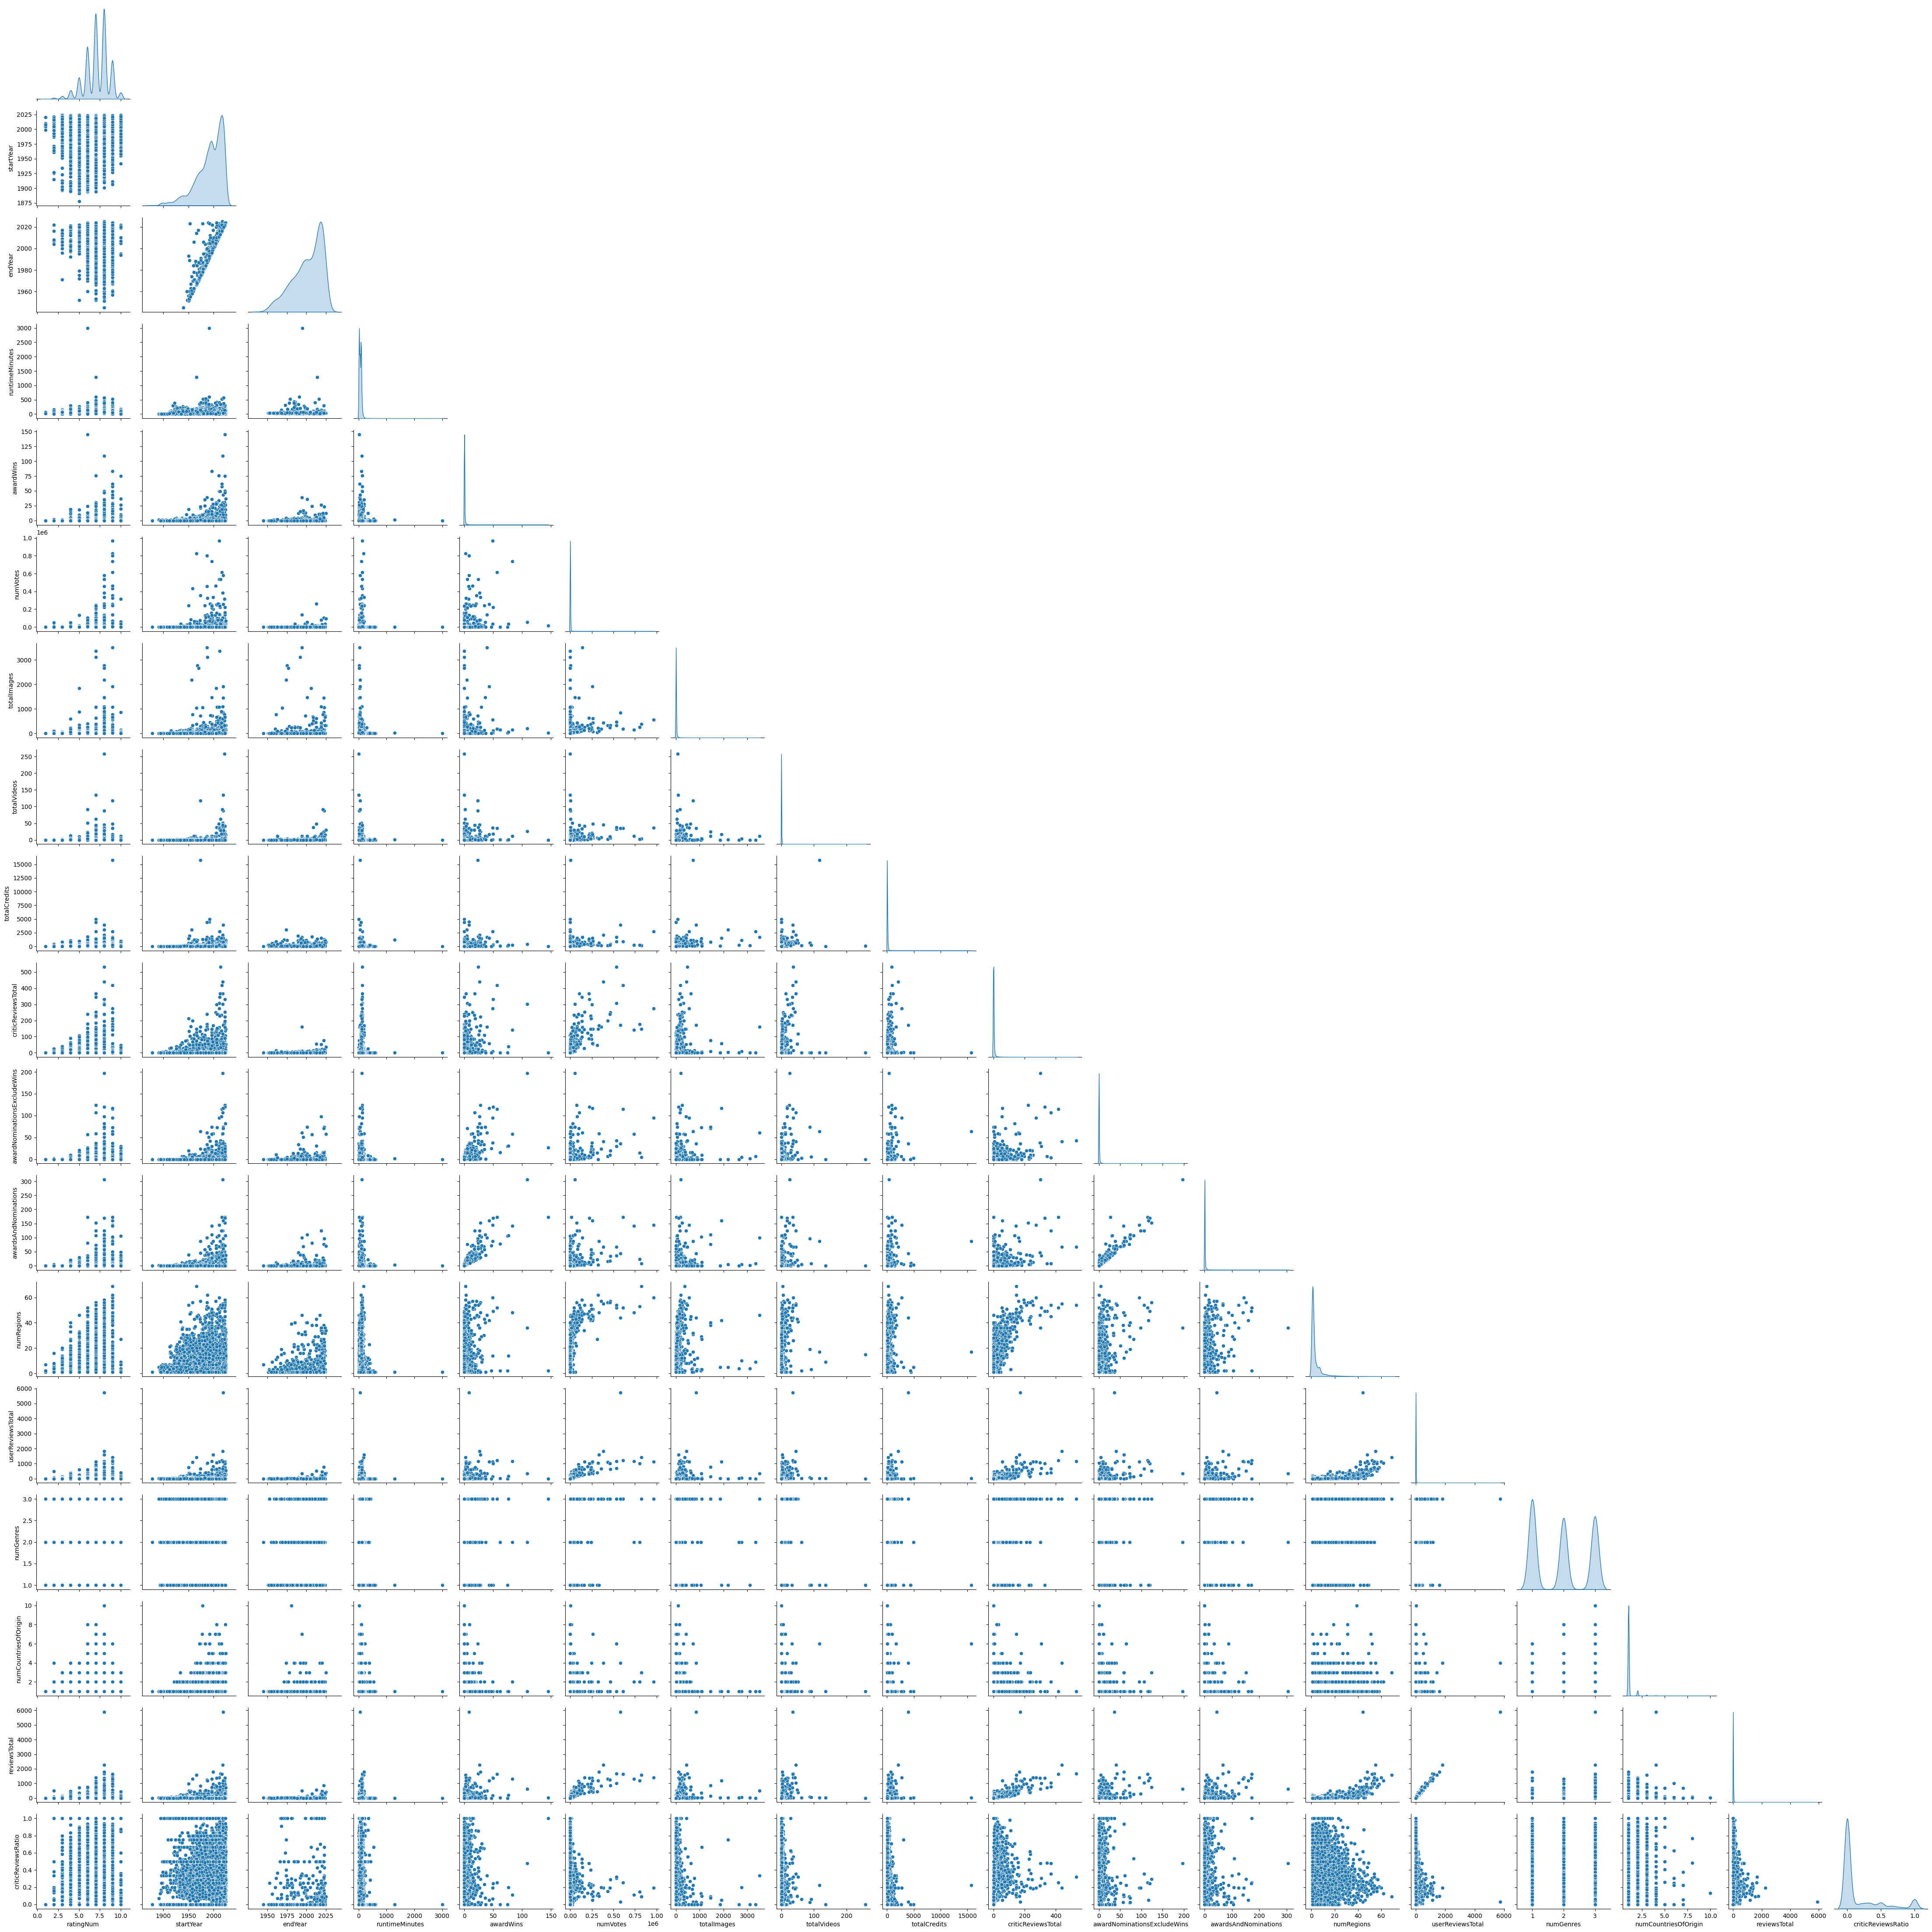

In [164]:
sns.pairplot(df[num_cols], diag_kind='kde', corner=True)

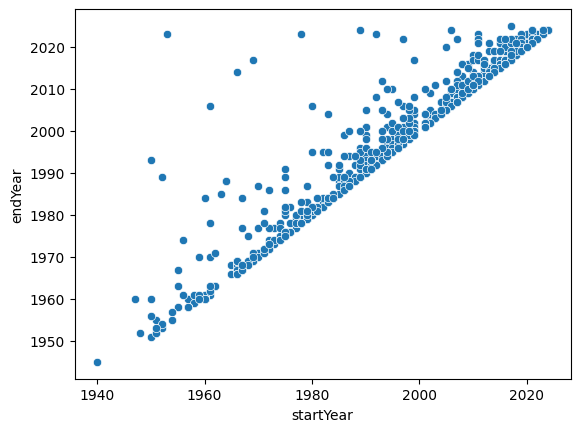

In [168]:
sns.scatterplot(df, x='startYear', y='endYear')
plt.show()

In [99]:
df.drop('endYear', axis=1, inplace=True)
num_cols.remove('endYear')

In [100]:
non_normal_cols = num_cols[3:-4] + num_cols[-3:-1]
non_normal_cols

['awardWins',
 'numVotes',
 'totalImages',
 'totalVideos',
 'totalCredits',
 'criticReviewsTotal',
 'awardNominationsExcludeWins',
 'awardsAndNominations',
 'numRegions',
 'userReviewsTotal',
 'numCountriesOfOrigin',
 'reviewsTotal']

On the other hand, it really doesn't make sense for the runtime distribution to approximate a power law. When excluding outliers (values higher than 3rd quartile + 1.5 IQR) when can see that for the most part runtimes are dependent on the title type and that the distribution of the runtime for each title type approximates a bell curve.

Therefore we prefer not to log transform this variable and be mindful of the presence of outliers for this variable.

<Axes: xlabel='runtimeMinutes'>

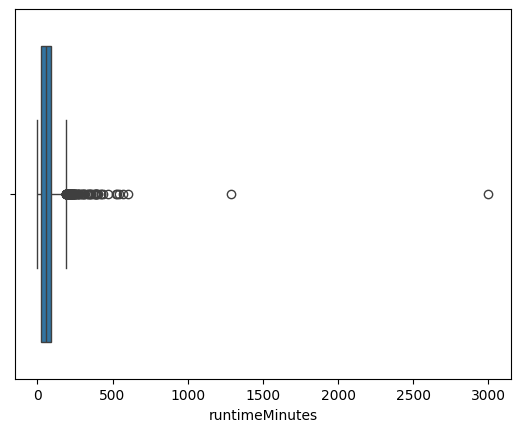

In [101]:
sns.boxplot(df, x='runtimeMinutes')

In [102]:
first_quart = df['runtimeMinutes'].quantile(.25)
third_quart = df['runtimeMinutes'].quantile(.75)
upper_limit = third_quart + 1.5 * (third_quart - first_quart)
inliers = df['runtimeMinutes'] <= upper_limit
upper_limit

np.float64(187.5)

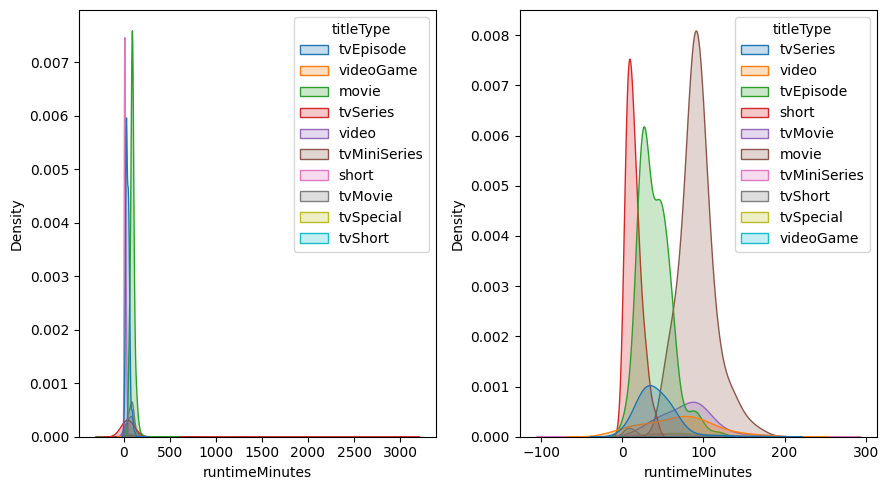

In [178]:
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(df, x='runtimeMinutes', hue='titleType', fill='titleType', bw_adjust=2)
plt.subplot(1, 2, 2)
sns.kdeplot(df[inliers], x='runtimeMinutes', hue='titleType', fill='titleType', bw_adjust=2)
plt.tight_layout()

In [104]:
df[-inliers].sort_values('runtimeMinutes', ascending=False)[['originalTitle', 'runtimeMinutes', 'titleType','genres']].head(20)

originalTitle  runtimeMinutes  \
13997                                     Alim Dayi          3000.0   
1280             Jerry Lewis MDA Labor Day Telethon          1290.0   
1098                            Voice of the Planet           600.0   
6333                                         Orbius           570.0   
5998            Heritage: Civilization and the Jews           540.0   
485                                         Selambs           528.0   
6147   Pacífico. Un viaje a los confines del hombre           520.0   
5532                                 Radosti zemnye           471.0   
6378                              Willem van Oranje           438.0   
1254                     Los nº1 de 40 en concierto           420.0   
2999                                   Lost Empires           420.0   
8959                              Ballada o bombere           400.0   
14859                     PS - Geschichten ums Auto           396.0   
5511                            Unser Auto wird 100           390.0   
12558                            Mistral's Daughter           390.0   
14515                                     Kidnapped           390.0   
2735            Arctic Mission: The Great Adventure           384.0   
8277                           La maison du mystère           382.0   
9461                    One World: Together at Home           367.0   
14421              Die Bilder des Zeugen Schattmann           357.0   

          titleType                       genres  
13997      tvSeries                     [Comedy]  
1280       tvSeries                       [News]  
1098   tvMiniSeries                      [Drama]  
6333          movie                    [Fantasy]  
5998       tvSeries                [Documentary]  
485    tvMiniSeries                      [Drama]  
6147       tvSeries                [Documentary]  
5532   tvMiniSeries                    [Romance]  
6378   tvMiniSeries  [Biography, Drama, History]  
1254      tvSpecial                      [Music]  
2999   tvMiniSeries                      [Drama]  
8959       tvSeries                        [War]  
14859      tvSeries                     [Family]  
5511       tvSeries       [Documentary, History]  
12558  tvMiniSeries             [Drama, Romance]  
14515  tvMiniSeries  [Adventure, Drama, History]  
2735          video                [Documentary]  
8277          movie               [Crime, Drama]  
9461      tvSpecial                      [Music]  
14421  tvMiniSeries                      [Drama]

Examining the titles with longer runtimes reveals that part of the outliers is due to the inconsistent strategy used for the computation of the runtime for serialized titles (series and miniseries): in some cases the episode runtime is provided in some other times the sum of all episodes runtimes.

#

In [105]:
df_log = df.copy()
for col in non_normal_cols:
    df_log[col] = np.log(df[col] + 1)

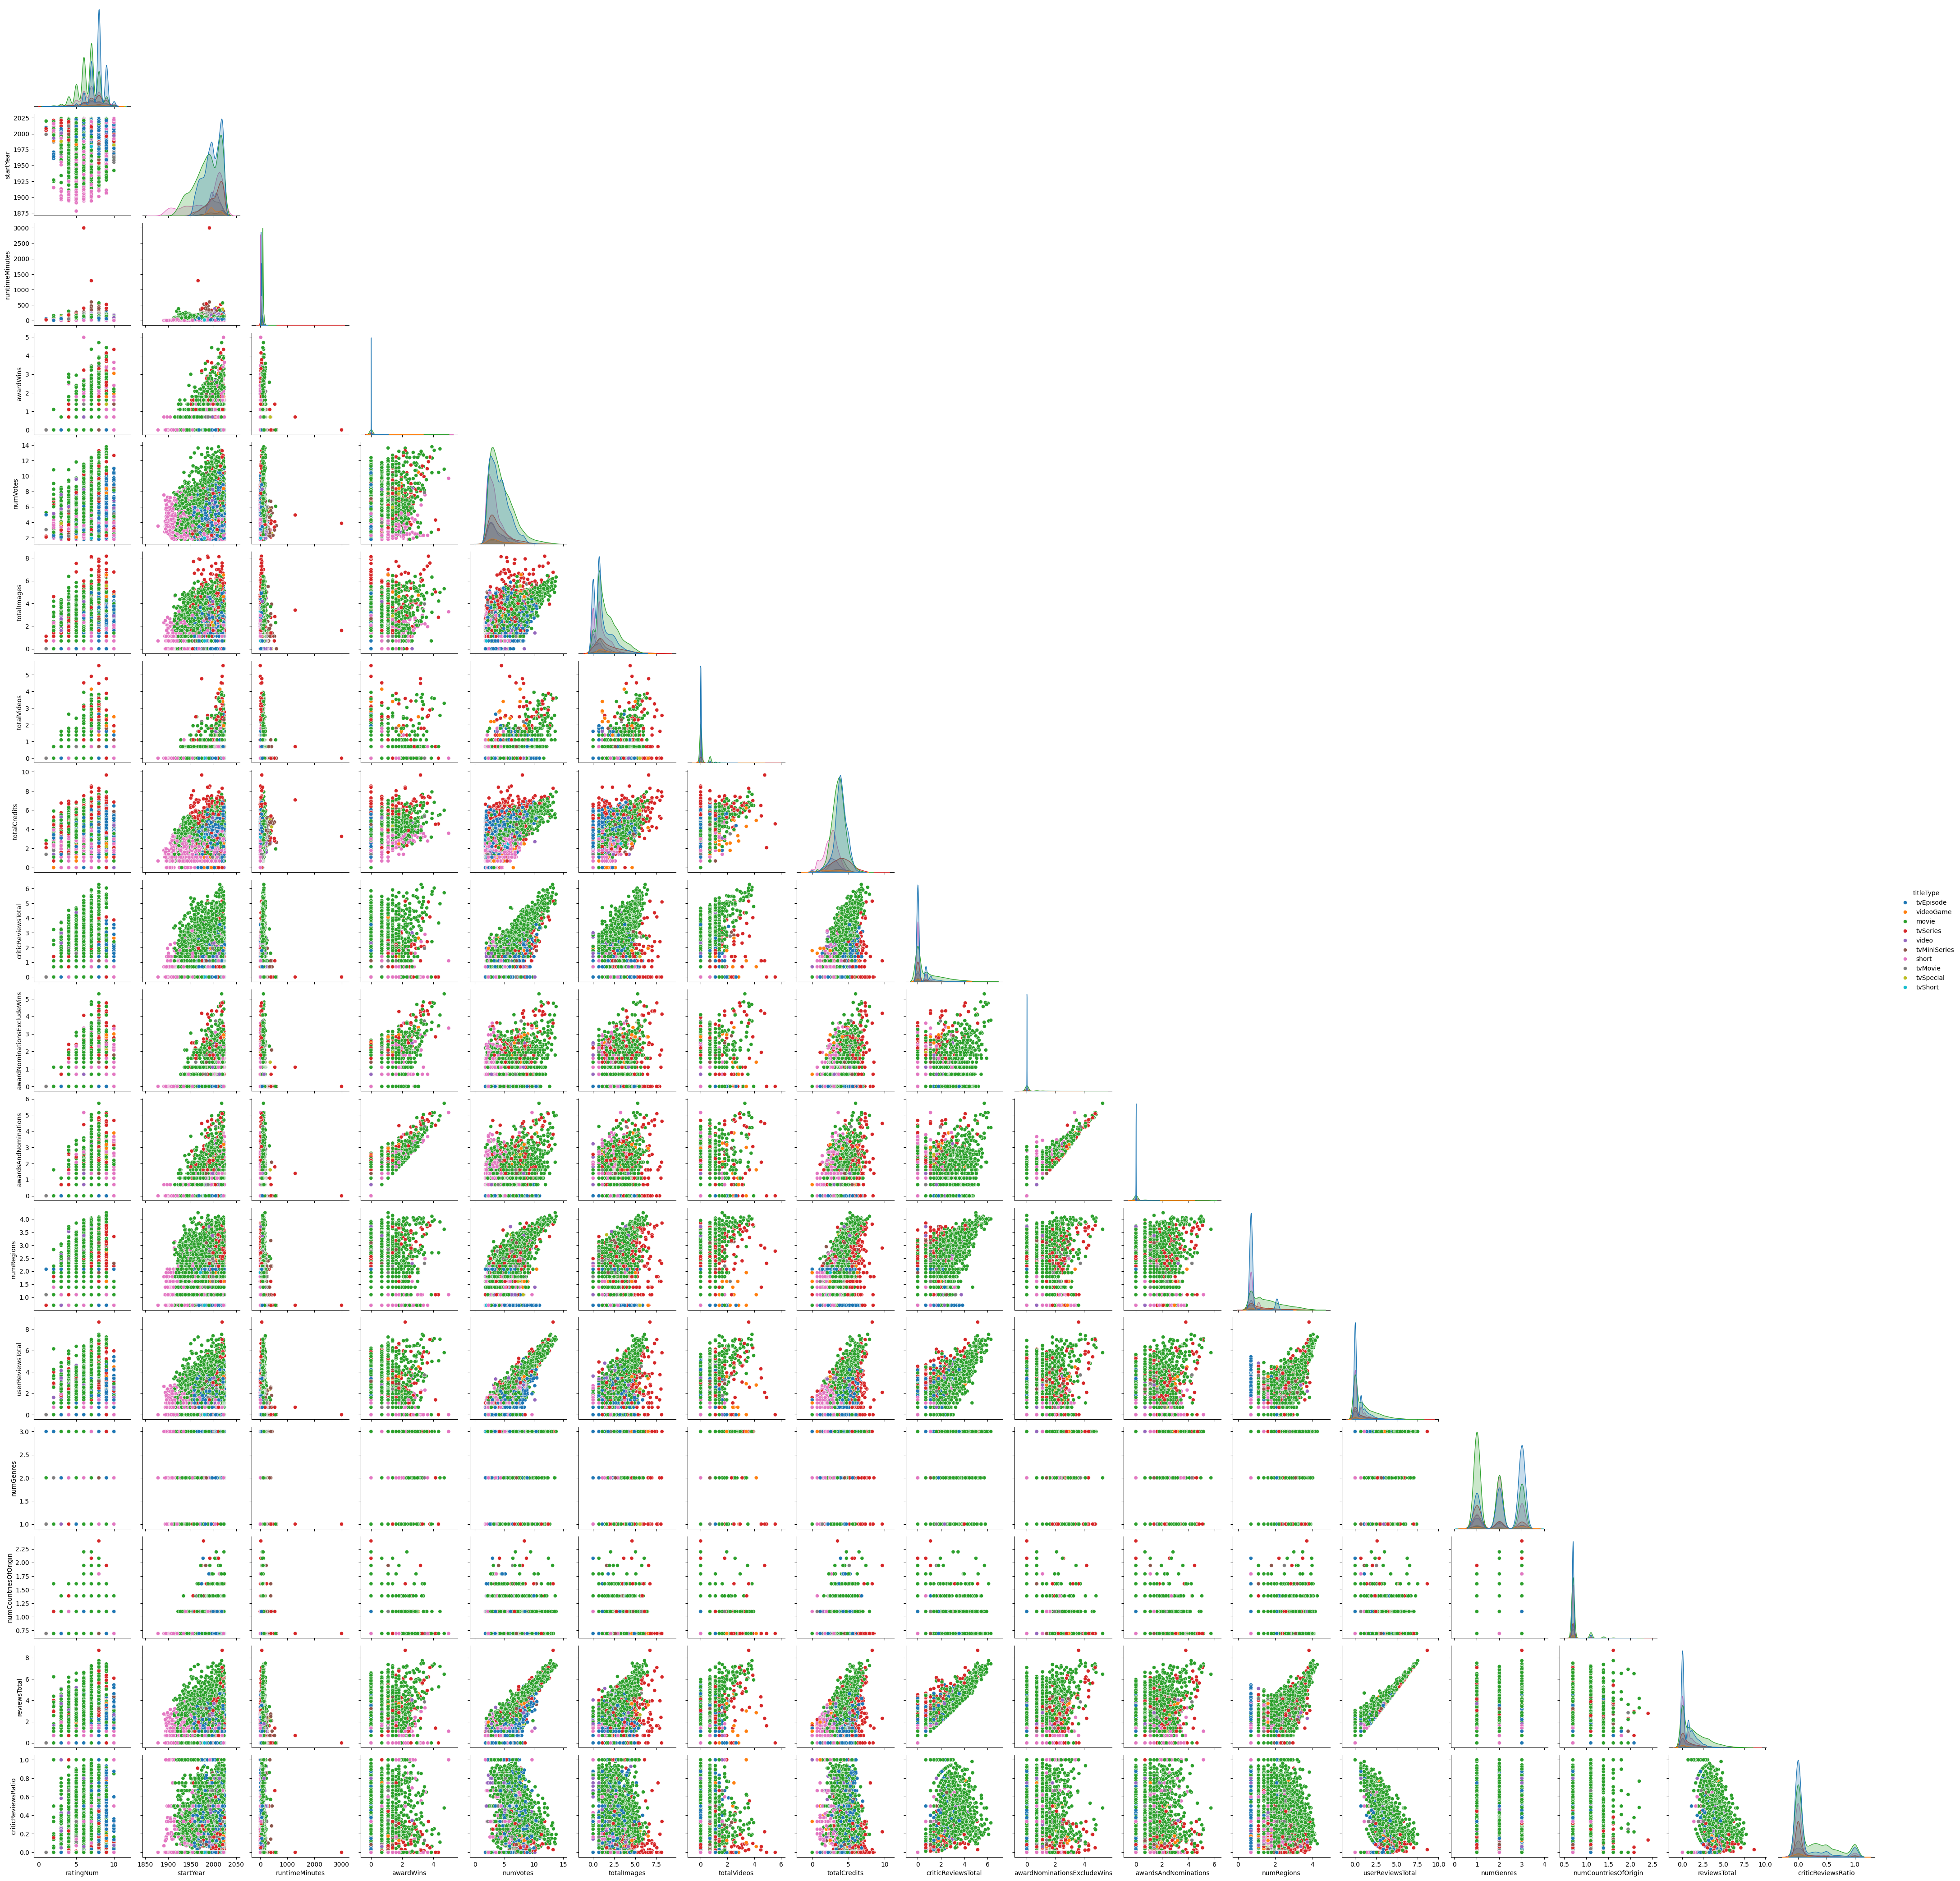

In [106]:
sns.pairplot(df_log[num_cols + ['titleType']], diag_kind='kde', hue='titleType',  corner=True)

<Axes: >

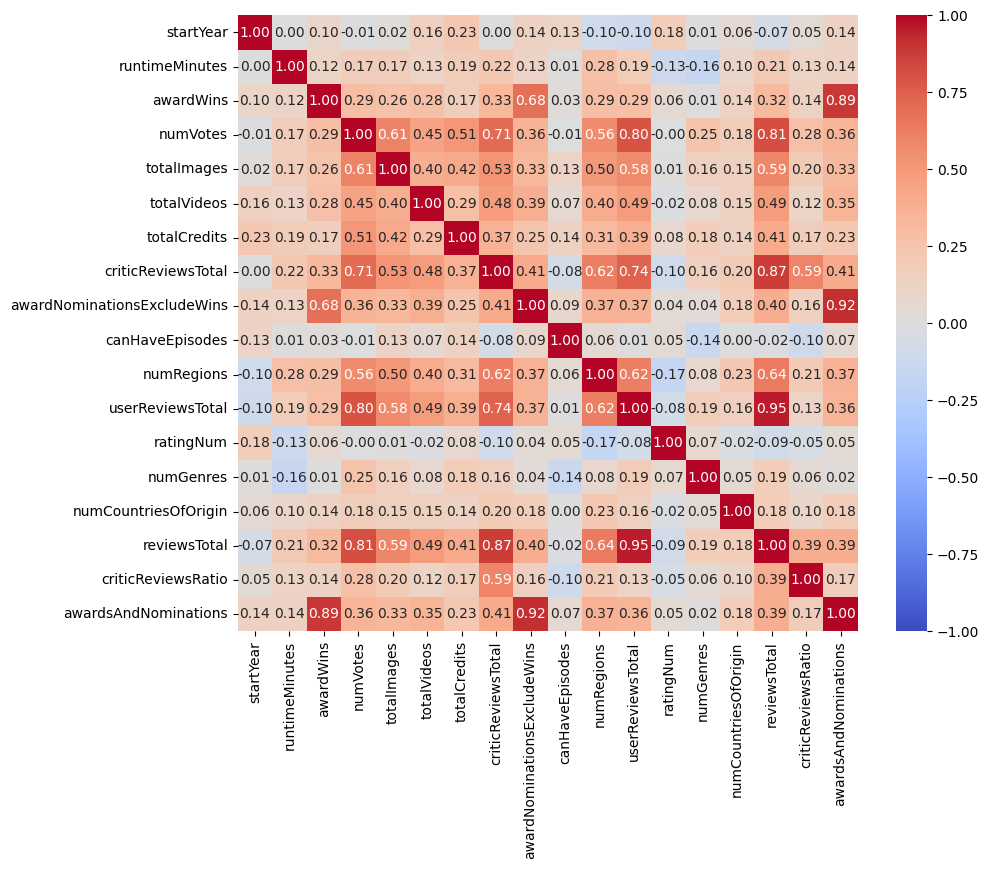

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_log.corr(numeric_only=True), cmap="coolwarm", center=0, vmin=-1, vmax=1, annot=True, fmt=".2f")

`numVotes`, `userReviewsTotal`, `criticReviewsTotal` and `reviewsTotal` are all highly positively correlated with each other.
We drop them all except `numVotes`, which has the least skewed distribution.

In [108]:
df_log.drop(['userReviewsTotal', 'reviewsTotal', 'criticReviewsTotal'], axis=1, inplace=True)

Since the distribution of awards and nomination is not simply skewed, but the majority of records received no awards and nomination, we convert the `awardsAndNominations` column to boolean and drop all the other columns.

In [109]:
df_log['awardsAndNominations'] = df['awardsAndNominations'] > 0
df_log['awardsAndNominations'].value_counts()

awardsAndNominations
False    13692
True      2739
Name: count, dtype: int64

In [110]:
df_log.drop(['awardWins', 'awardNominationsExcludeWins'], axis=1, inplace=True)

Similarly, the great majority of records had no videos, we create a boolean column `hasVideos` in order to track which records have at least one video and drop the original column.

In [111]:
df_log['hasVideos'] = df['totalVideos'] > 0
df_log['hasVideos'].value_counts()

hasVideos
False    14821
True      1610
Name: count, dtype: int64

In [112]:
df_log.drop(['totalVideos'], axis=1, inplace=True)

As for `numCountriesOfOrigin` the great majority of records has only one country of origin. We can track this information in a boolean column that stores whether the record has more than one country of origin and drop the original column.

In [113]:
df['numCountriesOfOrigin'].value_counts()

numCountriesOfOrigin
1     15285
2       897
3       167
4        51
5        16
6         7
7         5
8         2
10        1
Name: count, dtype: int64

In [114]:
df_log['moreCountriesOfOrigin'] = df['numCountriesOfOrigin'] > 1
print(df_log['moreCountriesOfOrigin'].value_counts())
df_log.drop(['numCountriesOfOrigin'], axis=1, inplace=True)

moreCountriesOfOrigin
False    15285
True      1146
Name: count, dtype: int64


In [115]:
num_cols = list(set(num_cols) - set(['userReviewsTotal', 'reviewsTotal', 'criticReviewsTotal', 'awardWins', 'awardNominationsExcludeWins', 'awardsAndNominations', 'totalVideos', 'numCountriesOfOrigin']))

<Axes: >

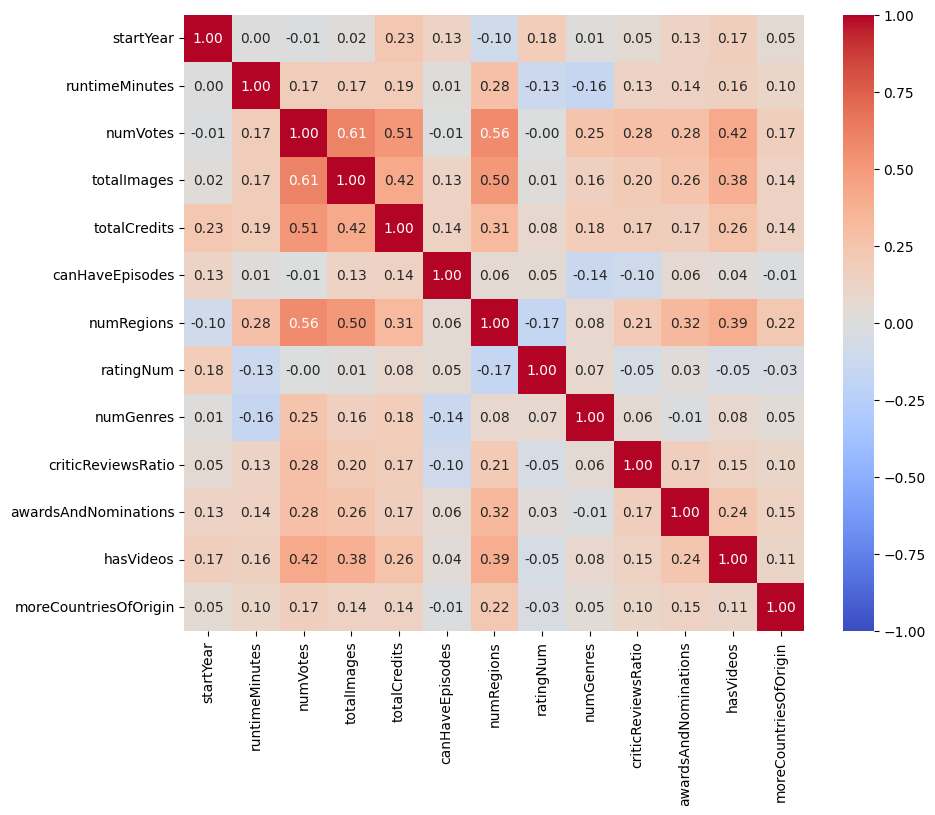

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_log.corr(numeric_only=True), cmap="coolwarm", center=0, vmin=-1, vmax=1, annot=True, fmt=".2f")

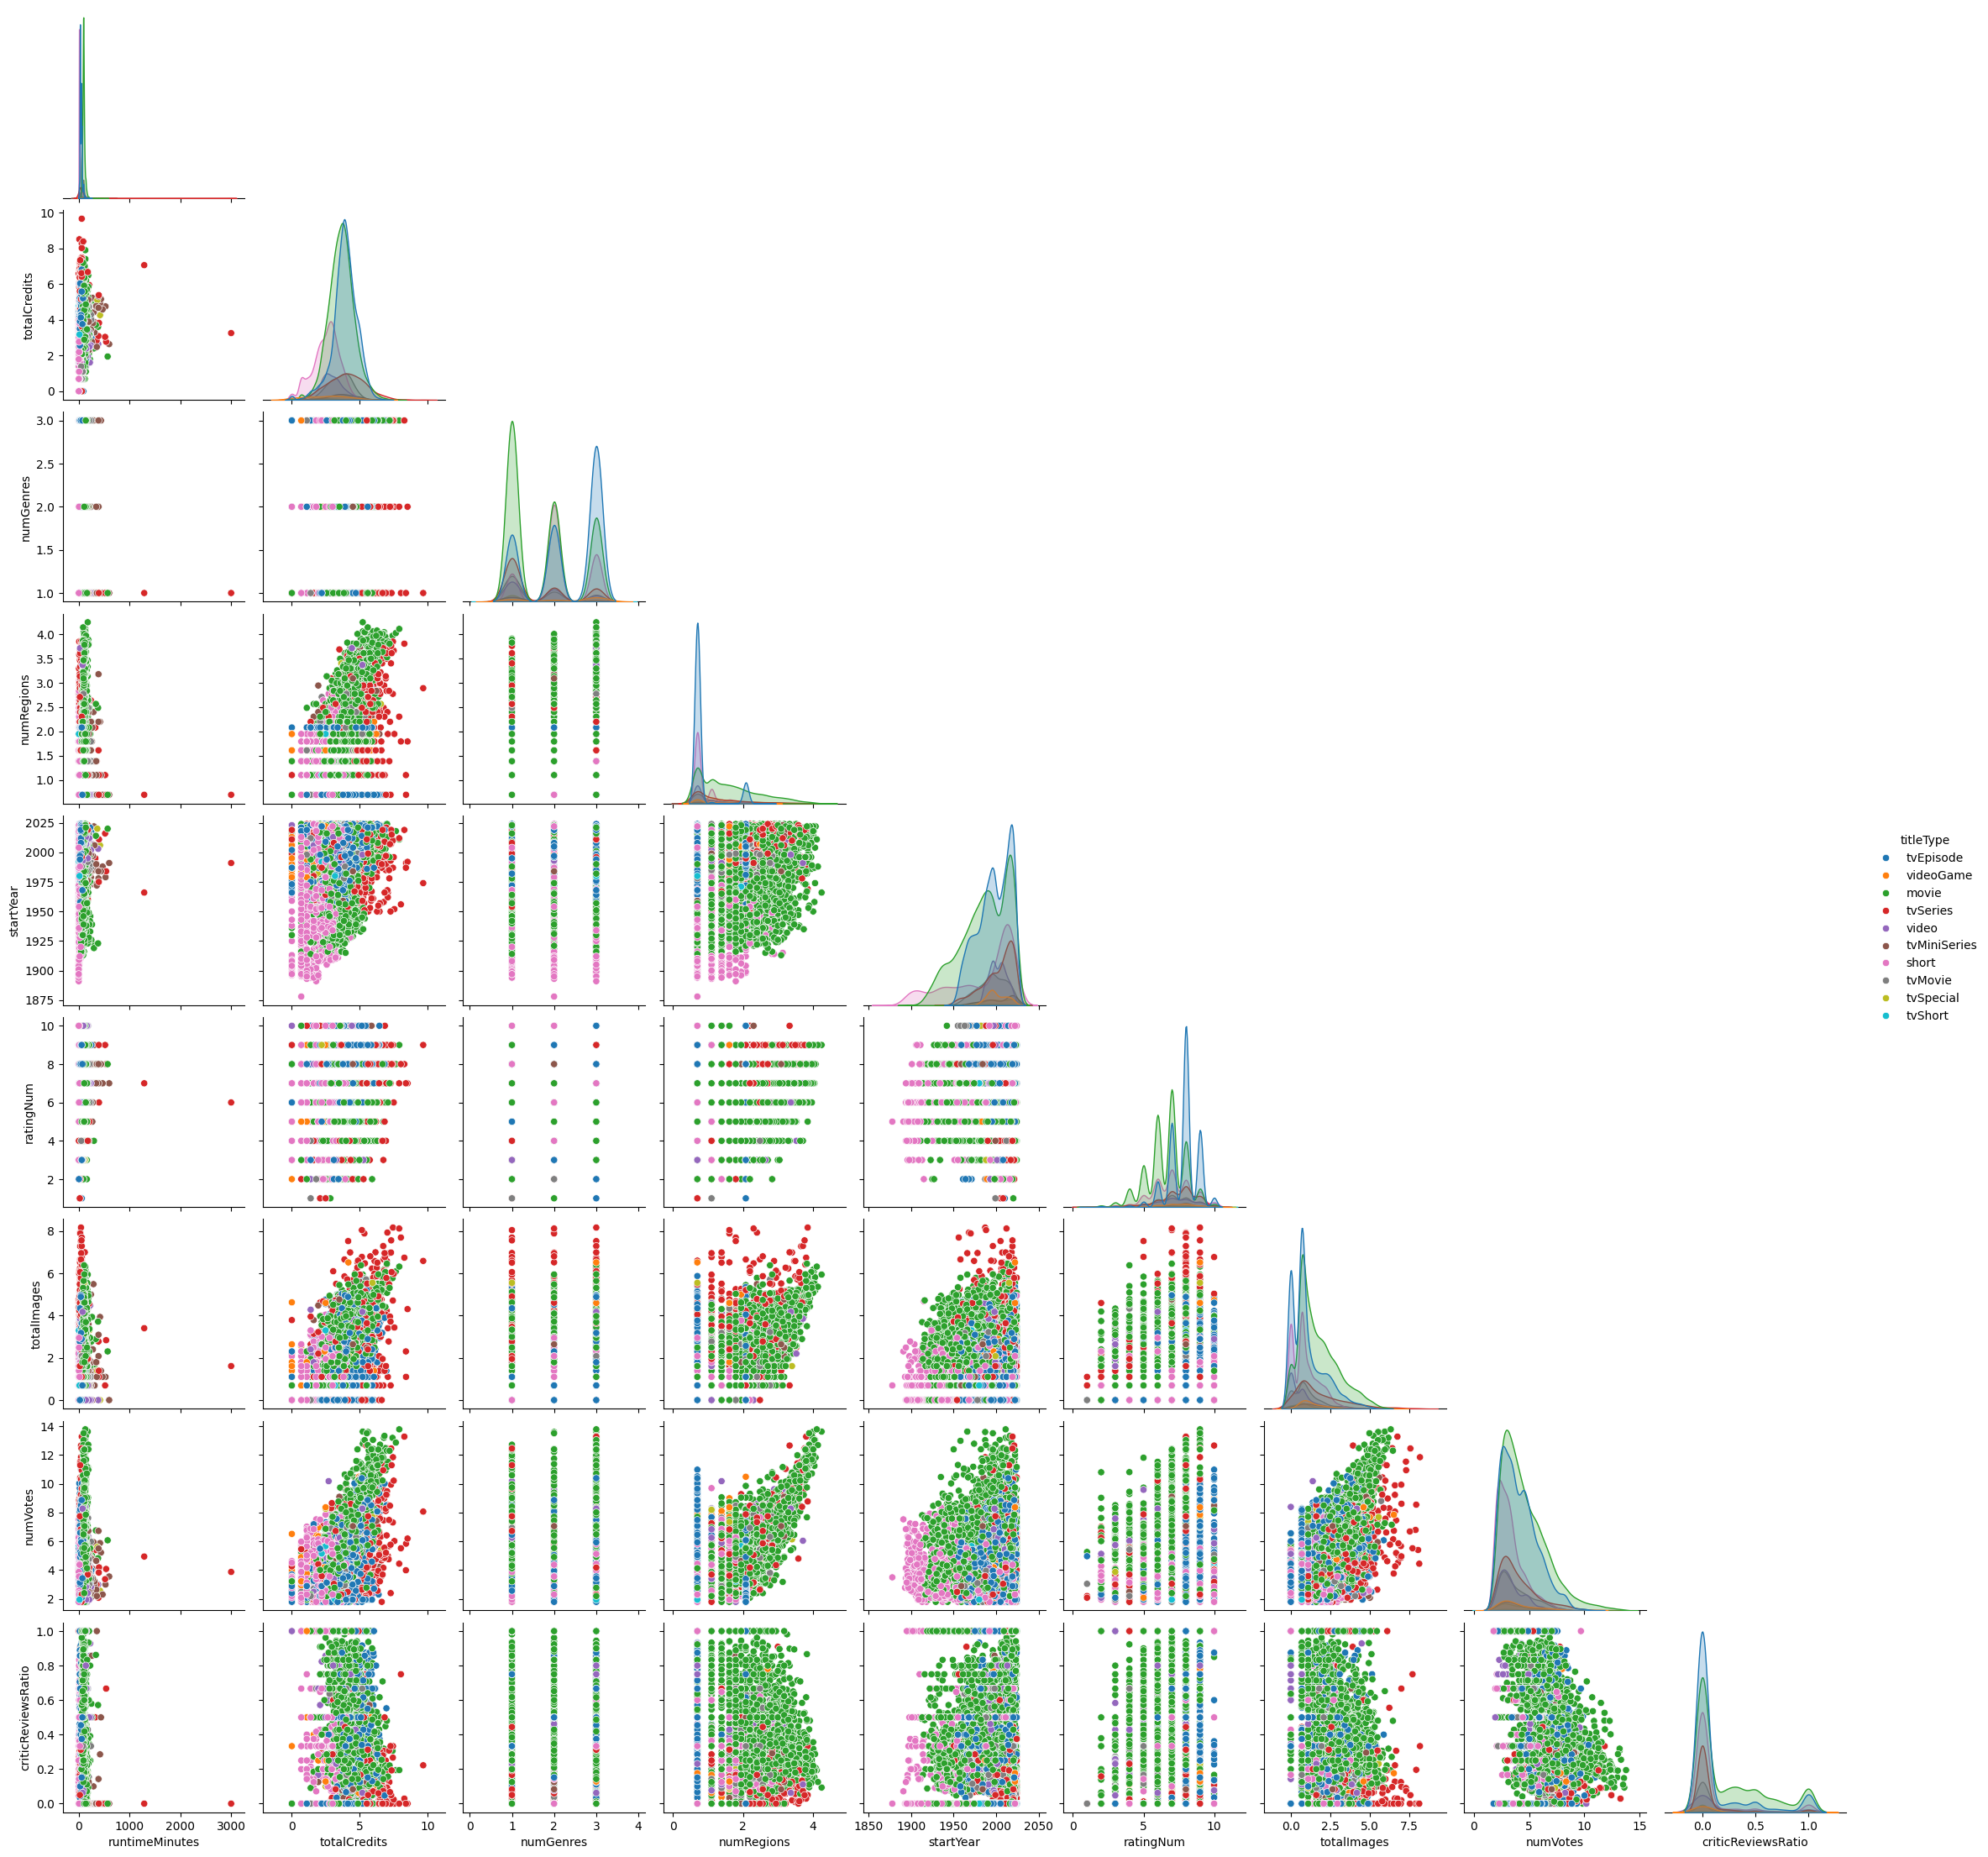

In [117]:
sns.pairplot(df_log[num_cols + ['titleType']], diag_kind='kde', hue='titleType',  corner=True)

We can see that the `runtimeMinutes` is dependent on the `titleType` of a record: movies are generally longer than tv episodes and shorts are tipycally shorter than both. Since we have some missing values for `runtimeMinutes` we can use the median value for that type to fill them.

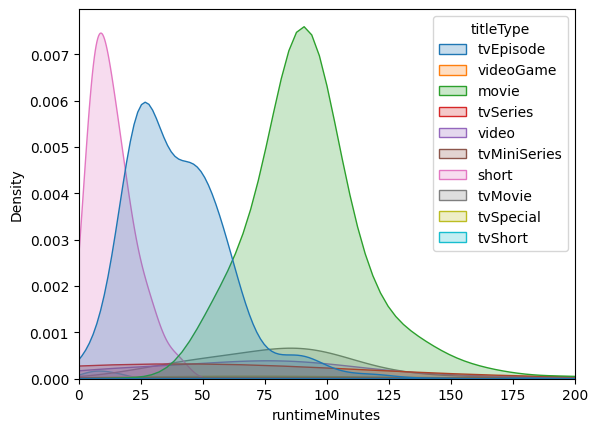

In [118]:
sns.kdeplot(df_log, x='runtimeMinutes', hue='titleType', fill='titleType', bw_adjust=2)
plt.xlim(0, 200)
plt.show()

In [119]:
runtime_by_type = df_log.groupby('titleType')['runtimeMinutes'].median().to_dict()
runtime_by_type

{'movie': 90.0,
 'short': 12.0,
 'tvEpisode': 40.0,
 'tvMiniSeries': 60.0,
 'tvMovie': 86.0,
 'tvSeries': 31.0,
 'tvShort': 10.0,
 'tvSpecial': 60.0,
 'video': 76.0,
 'videoGame': 28.0}

In [120]:
no_runtime = df_log['runtimeMinutes'].isna()

In [121]:
df_log['runtimeMinutes'].fillna(df_log['titleType'].map(runtime_by_type), inplace=True)

C:\Users\camim\AppData\Local\Temp\ipykernel_28460\1206454850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_log['runtimeMinutes'].fillna(df_log['titleType'].map(runtime_by_type), inplace=True)


In [122]:
df_log.isna().sum()

originalTitle            0
rating                   0
startYear                0
runtimeMinutes           0
numVotes                 0
totalImages              0
totalCredits             0
titleType                0
canHaveEpisodes          0
numRegions               0
countryOfOrigin          0
genres                   0
ratingNum                0
numGenres                0
criticReviewsRatio       0
awardsAndNominations     0
hasVideos                0
moreCountriesOfOrigin    0
dtype: int64

No more missing values

In [67]:
df_log.to_csv( result_dir / 'train_clean.csv')

## Processing the test set

In [68]:
test_df = pd.read_csv( data_dir / 'dm1_dataset_2425_imdb/test.csv', na_values='\\N')
test_df.shape

(5478, 23)

In [69]:
test_df['countryOfOrigin'] = test_df['countryOfOrigin'].apply(ast.literal_eval)
test_df['genres'] = test_df['genres'].str.split(',')

In [70]:
test_df['awardWins'].fillna(0, inplace=True)
test_df['genres'].fillna(df['titleType'].map(top_genres), inplace=True)


test_df['ratingNum'] = test_df['rating']
test_df = test_df.replace({'ratingNum': rating_map})

test_df['numGenres'] = test_df['genres'].str.len()
test_df['numCountriesOfOrigin'] = df['countryOfOrigin'].str.len()
test_df['reviewsTotal'] = test_df['criticReviewsTotal'] + test_df['userReviewsTotal']
test_df['criticReviewsRatio'] = test_df['criticReviewsTotal'] / test_df['reviewsTotal']
test_df['criticReviewsRatio'].fillna(0, inplace=True)
test_df['awardsAndNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']

to_drop = ['bestRating', 'worstRating', 'isRatable', 'ratingCount', 'isAdult', 'endYear']
test_df.drop(to_drop, axis=1, inplace=True)

test_df_log = test_df.copy()
for col in non_normal_cols:
    test_df_log[col] = np.log(test_df[col] + 1)


test_df_log['awardsAndNominations'] = test_df_log['awardsAndNominations'] > 0
test_df_log['hasVideos'] = df['totalVideos'] > 0
test_df_log['moreCountriesOfOrigin'] = test_df_log['numCountriesOfOrigin'] > 1
test_df_log['runtimeMinutes'].fillna(test_df_log['titleType'].map(runtime_by_type), inplace=True)

to_drop = ['userReviewsTotal', 'reviewsTotal', 'criticReviewsTotal', 'awardWins', 'awardNominationsExcludeWins',
           'totalVideos', 'numCountriesOfOrigin']
test_df_log.drop(to_drop, axis=1, inplace=True)


/tmp/ipykernel_13945/1834361650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['awardWins'].fillna(0, inplace=True)
/tmp/ipykernel_13945/1834361650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [71]:
test_df_log.isna().sum()

originalTitle            0
rating                   0
startYear                0
runtimeMinutes           0
numVotes                 0
totalImages              0
totalCredits             0
titleType                0
canHaveEpisodes          0
numRegions               0
countryOfOrigin          0
genres                   0
ratingNum                0
numGenres                0
criticReviewsRatio       0
awardsAndNominations     0
hasVideos                0
moreCountriesOfOrigin    0
dtype: int64

In [72]:
test_df_log.to_csv(result_dir / 'test_clean.csv')